# Efficient-CapsNet Model Test

In this notebook we provide a simple interface to test the different trained Efficient-CapsNet models on the three datasets:

- MNIST (MNIST)
- smallNORB (SMALLNORB)
- Multi-MNIST (MULTIMNIST)

**NB**: remember to modify the "config.json" file with the appropriate parameters.

In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import tensorflow as tf
from utils import Dataset, plotImages, plotWrongImages
from examples.mnist.model import EfficientCapsNet

In [5]:
# some parameters
model_name = 'MNIST' 
custom_path = None # if you've trained a new model, insert here the full graph weights path

# 1.0 Import the Dataset

In [6]:
dataset = Dataset(model_name, config_path='config.json')

[INFO] Dataset loaded!


## 1.1 Visualize imported dataset

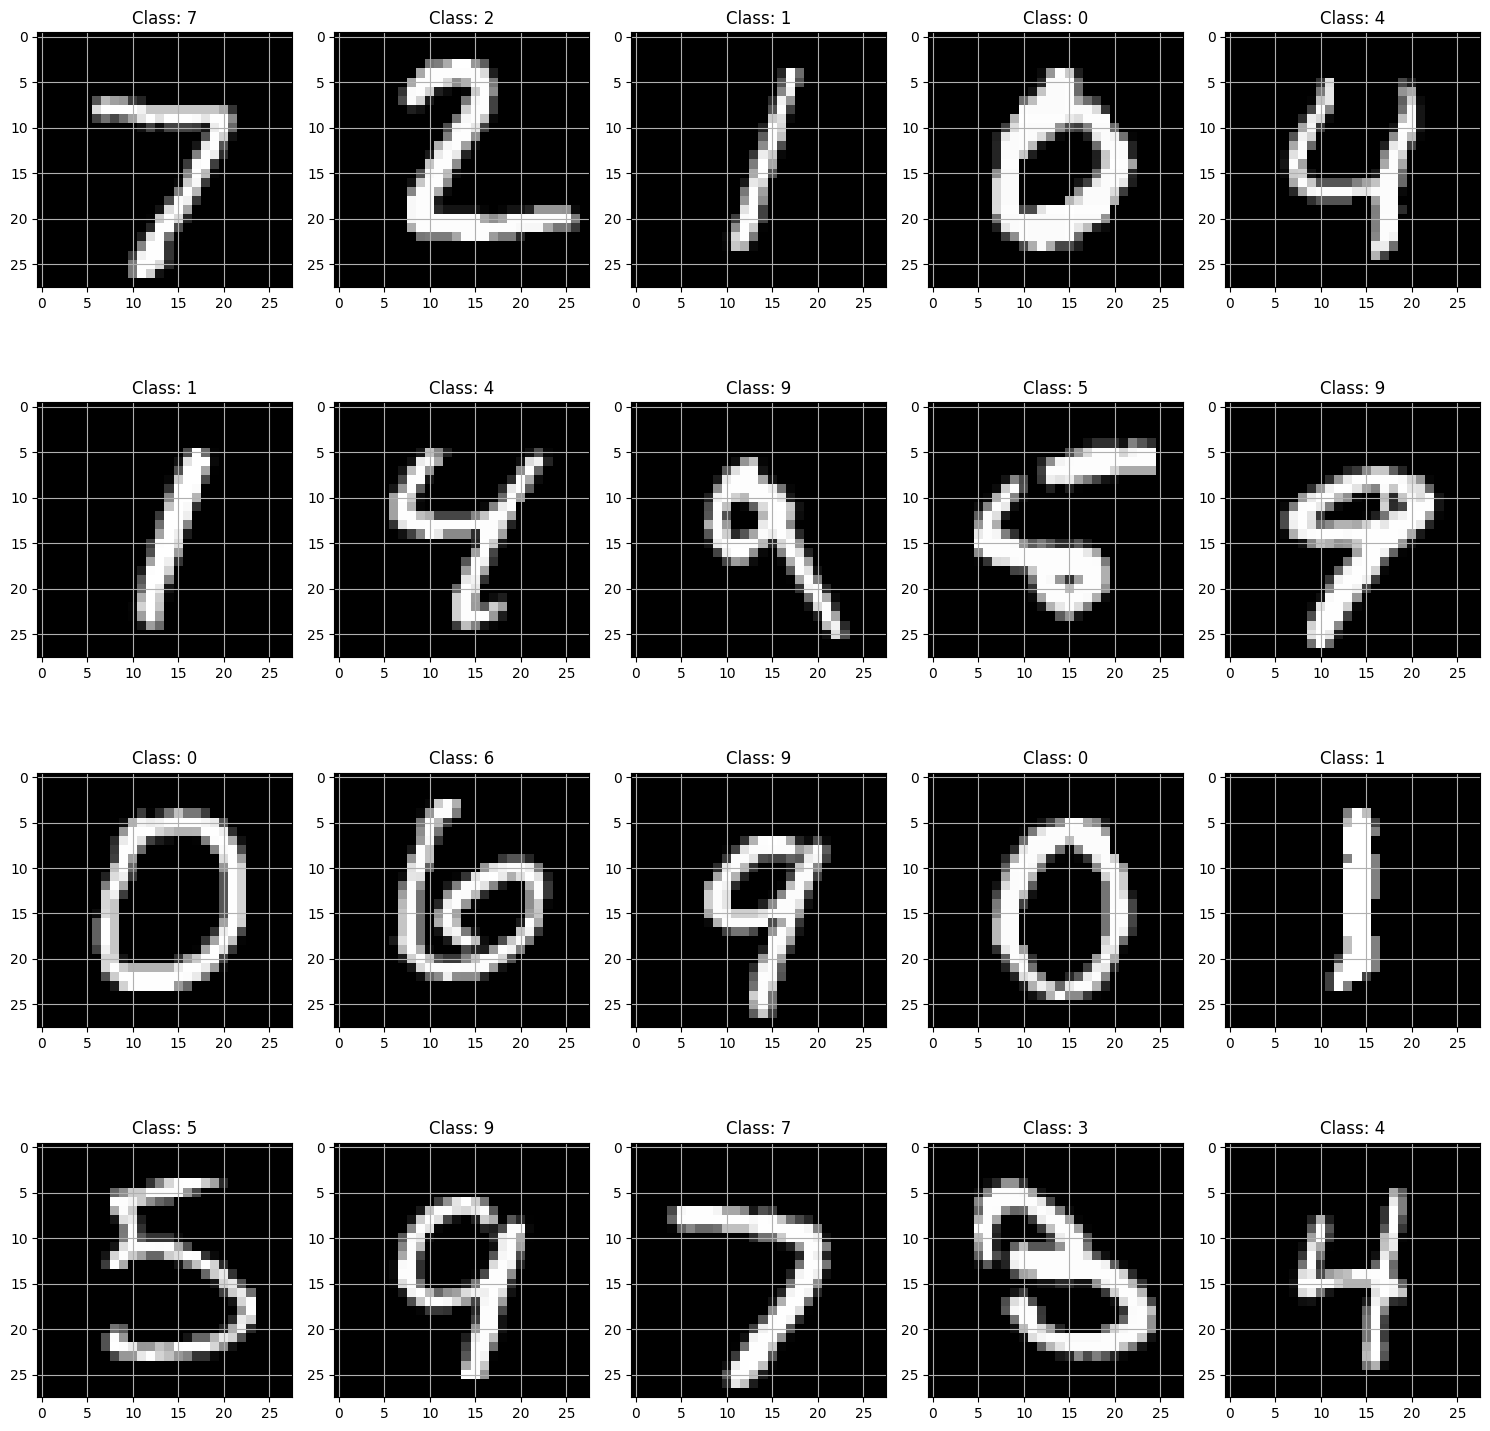

In [7]:
n_images = 20 # number of images to be plotted
plotImages(dataset.X_test[:n_images,...,0], dataset.y_test[:n_images], n_images, dataset.class_names)

# 2.0 Load the Model

In [16]:
model_test = EfficientCapsNet(model_name, mode='test', verbose=True, custom_path=custom_path)

model_test.load_graph_weights() # load graph weights (bin folder)

Model: "Efficient_CapsNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 batch_normalization_12 (Ba  (None, 24, 24, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_13 (Conv2D)          (None, 22, 22, 64)        18496     
                                                                 
 batch_normalization_13 (Ba  (None, 22, 22, 64)        256       
 tchNormalization)                                               
                                                                 
 conv2d_14 (Conv2D)          (None, 20, 20, 64)  

# 3.0 Test the Model

In [17]:
model_test.evaluate(dataset.X_test, dataset.y_test) # if "smallnorb" use X_test_patch

------------------------------MNIST Evaluation------------------------------
313/313 [==============================] - 1s 2ms/step
Test acc: 0.9974
Test error [%]: 0.2600%
N° misclassified images: 26 out of 10000


## 3.1 Plot misclassified images

313/313 [==============================] - 1s 2ms/step


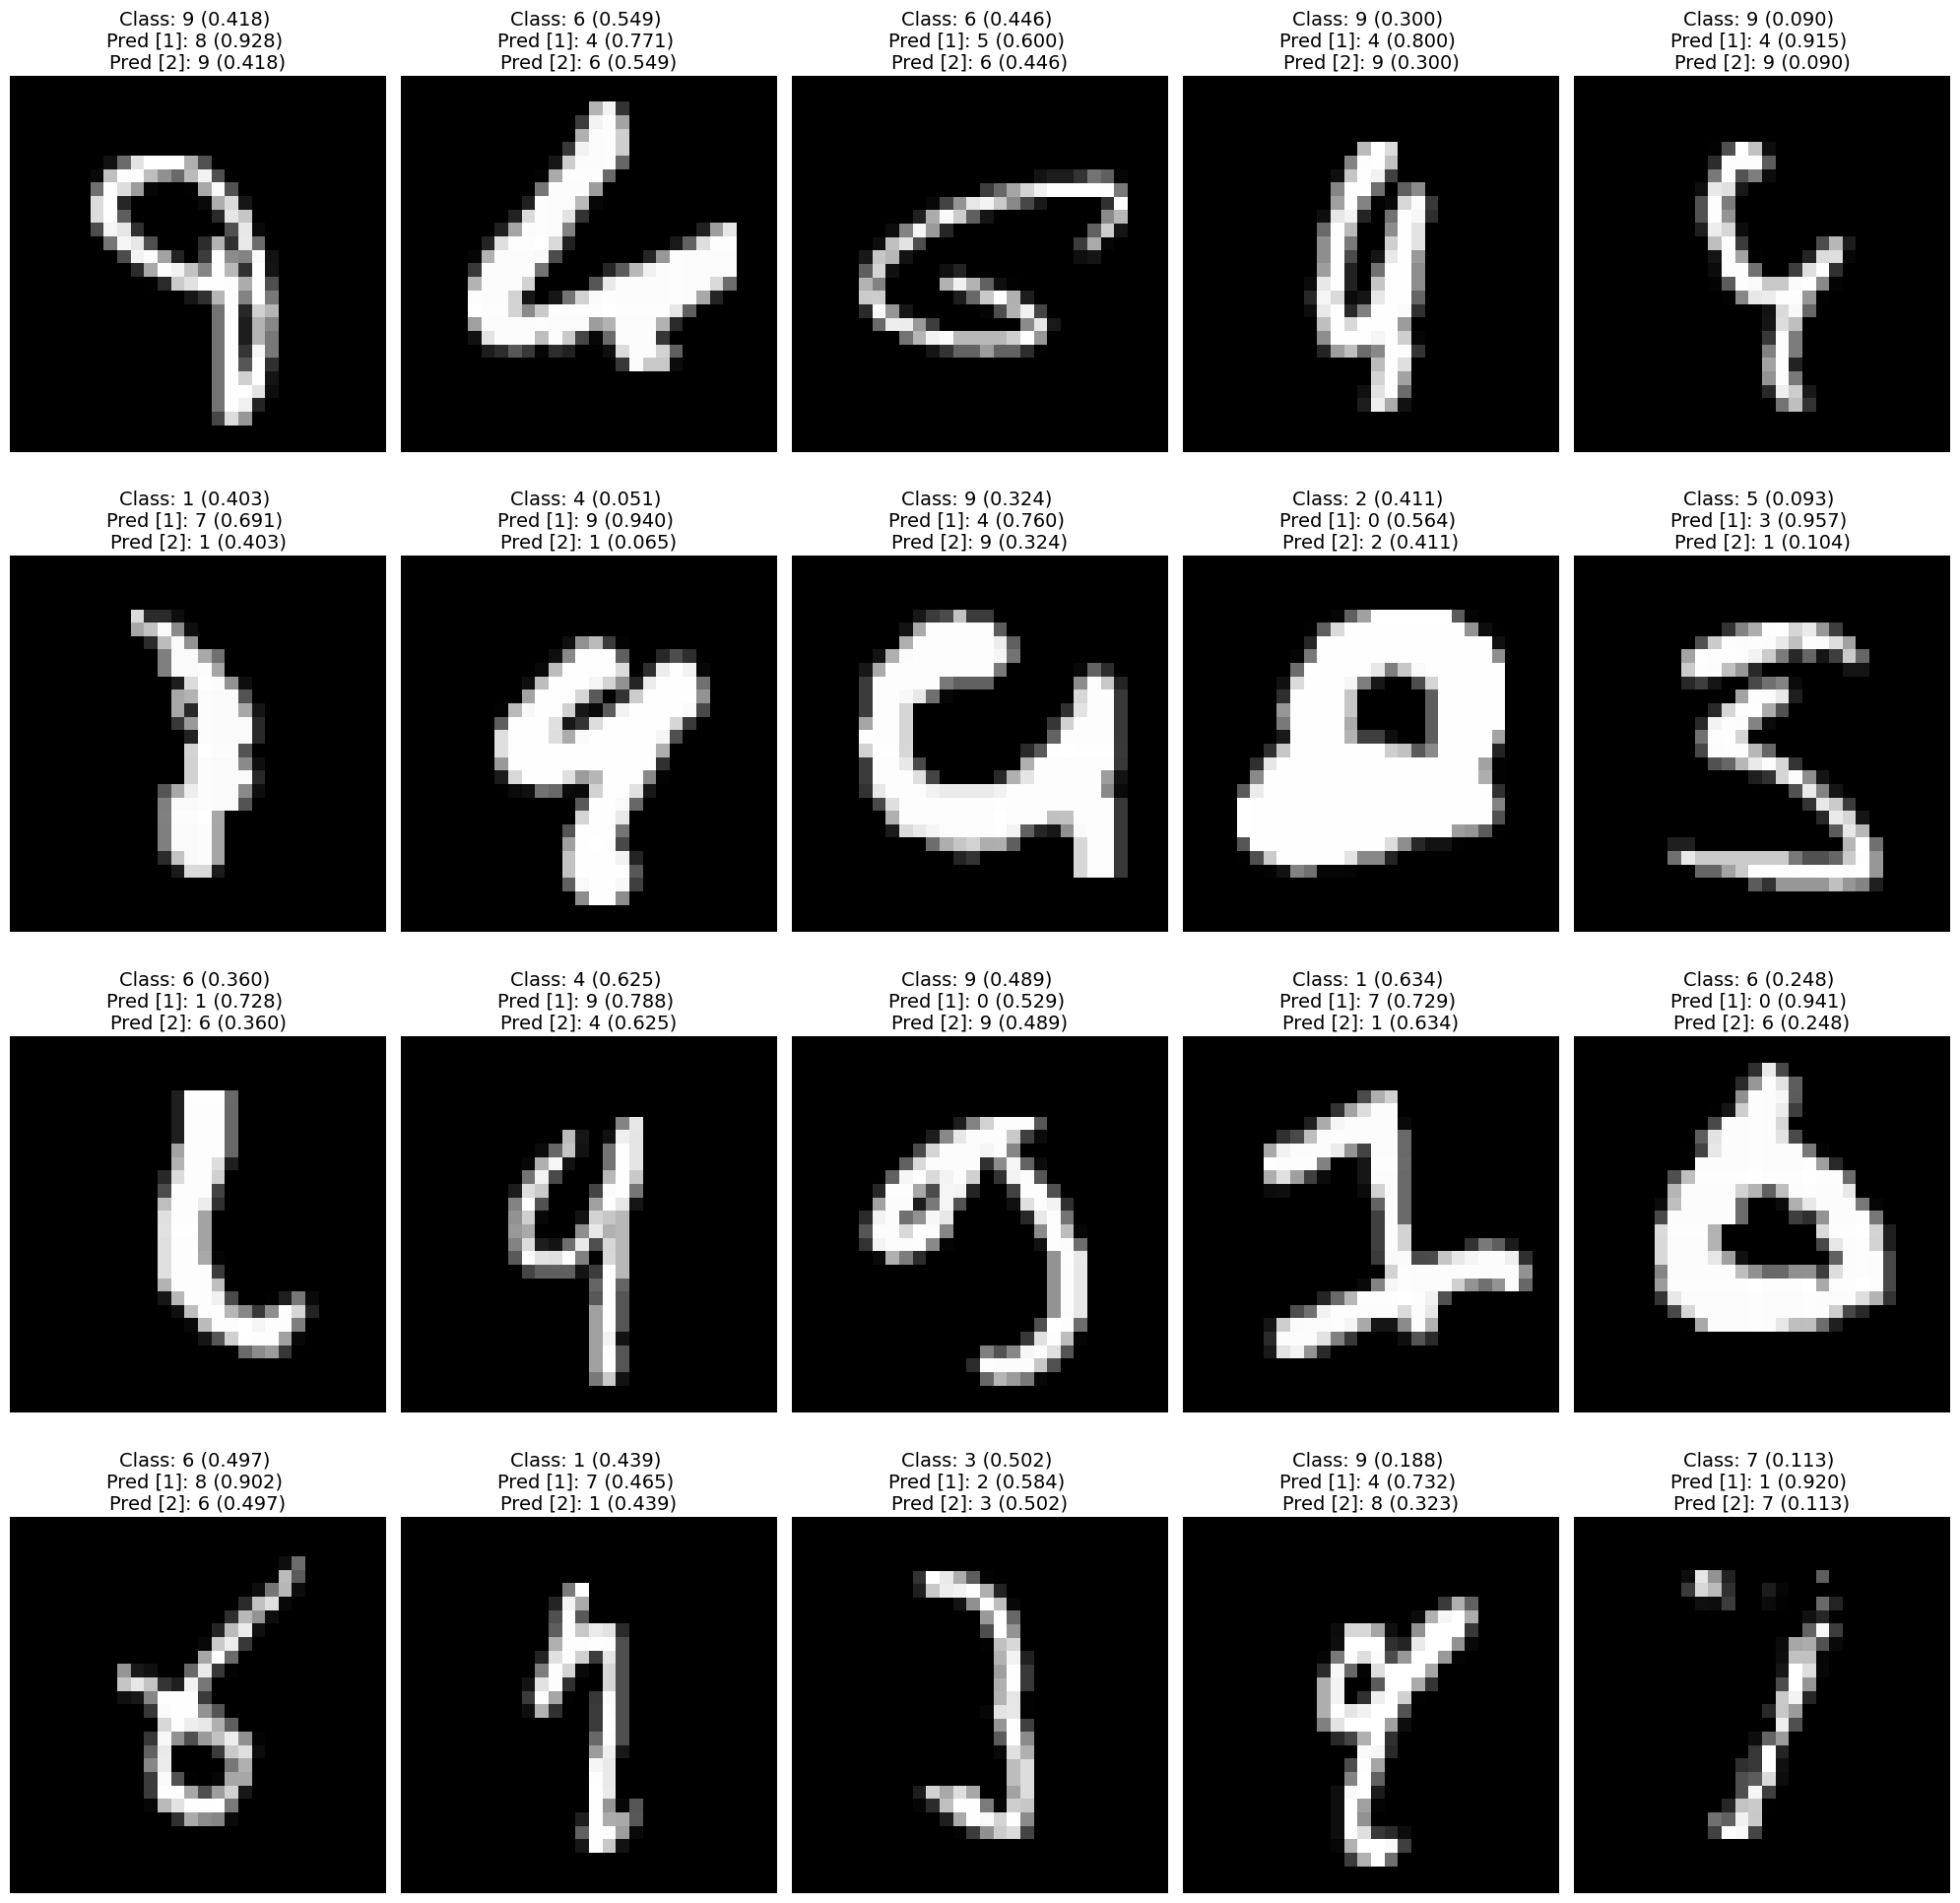

In [11]:
#not working with MultiMNIST
y_pred = model_test.predict(dataset.X_test)[0] # if "smallnorb" use X_test_patch

n_images = 20
plotWrongImages(dataset.X_test, dataset.y_test, y_pred, # if "smallnorb" use X_test_patch
                n_images, dataset.class_names)